<a href="https://colab.research.google.com/github/olhaishchenko/-data_science/blob/master/HW_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import math

import os
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential, Model


In [69]:
from keras.datasets import fashion_mnist

# Загружаем датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [70]:
num_classes = 10
num_features = 28 * 28

lr = 0.001
n_epochs = 10
batch_size = 256

In [71]:
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
x_train, x_test = x_train / 255., x_test / 255.

In [72]:

label = \
{
    0:"T-shirt/top",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle boot",
}


Text(0.5, 1.0, 'Ankle boot')

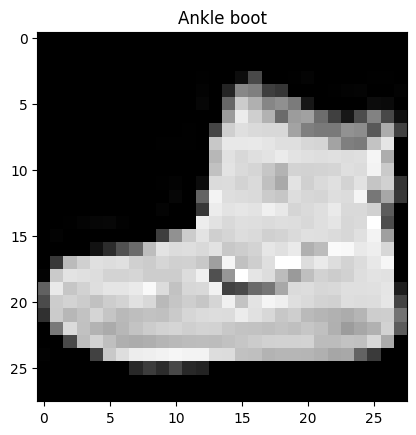

In [73]:
plt.imshow(x_train[0].reshape(28, 28), cmap="gray")
plt.title(label[y_train[0]])

In [74]:
class Dataset(tf.keras.utils.Sequence):
    def __init__(self, x, y, shuffle=True, batch_size=256):
        self.x = x
        self.y = y
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.x))
        self.batch_size = batch_size

        if shuffle:
            self.on_epoch_end()

    def __len__(self):
        return len(self.x) // self.batch_size
        # return math.ceil(len(self.x) / self.batch_size) # округлюємо результат вгору

    def __getitem__(self, n):
        indexes = self.indexes[n * self.batch_size : (n + 1) * self.batch_size]
        batch_x = [self.x[i] for i in indexes]
        batch_y = [tf.keras.utils.to_categorical(self.y[i], num_classes) for i in indexes]

        return np.array(batch_x), np.array(batch_y)

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

In [75]:
x_train_part, x_valid, y_train_part, y_valid = train_test_split(x_train, y_train, test_size=0.2, shuffle=True)

In [76]:
x_train_part.shape, y_train_part.shape, x_valid.shape, x_test.shape

((48000, 784), (48000,), (12000, 784), (10000, 784))

In [87]:
train_dataset = Dataset(x_train, y_train, shuffle=True, batch_size=batch_size)
valid_dataset = Dataset(x_valid, y_valid, shuffle=False, batch_size=batch_size)

In [88]:
from tensorflow.keras.initializers import RandomNormal

model = Sequential(
    [
        Dense(1024, activation="relu", input_shape=(num_features,)),
        Dense(1024, activation="relu"),
        Dense(1024, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

In [89]:
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import CategoricalAccuracy

model.compile(
    optimizer=Adam(learning_rate=lr),
    loss="categorical_crossentropy",
    metrics=[CategoricalAccuracy()],
)

In [90]:
callback_early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=2,
    verbose=1
)


callback_save = ModelCheckpoint(
    "best.hdf5",
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)

In [91]:
history = model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=20,
    verbose=1,
    callbacks=[callback_early_stopping, callback_save]
)

Epoch 1/20
233/234 [============================>.] - ETA: 0s - loss: 0.4871 - categorical_accuracy: 0.8233
Epoch 1: val_loss improved from inf to 0.36447, saving model to best.hdf5
234/234 [==============================] - 4s 10ms/step - loss: 0.4865 - categorical_accuracy: 0.8235 - val_loss: 0.3645 - val_categorical_accuracy: 0.8659
Epoch 2/20
232/234 [============================>.] - ETA: 0s - loss: 0.3450 - categorical_accuracy: 0.8730
Epoch 2: val_loss improved from 0.36447 to 0.31362, saving model to best.hdf5
234/234 [==============================] - 2s 9ms/step - loss: 0.3449 - categorical_accuracy: 0.8730 - val_loss: 0.3136 - val_categorical_accuracy: 0.8791
Epoch 3/20
234/234 [==============================] - ETA: 0s - loss: 0.3137 - categorical_accuracy: 0.8829
Epoch 3: val_loss improved from 0.31362 to 0.29959, saving model to best.hdf5
234/234 [==============================] - 2s 9ms/step - loss: 0.3137 - categorical_accuracy: 0.8829 - val_loss: 0.2996 - val_categoric

In [92]:
model.save_weights("my_model.hdf5")

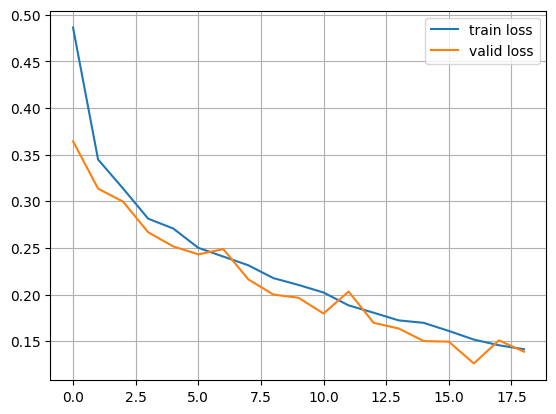

In [93]:
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="valid loss")
plt.legend()
plt.grid()

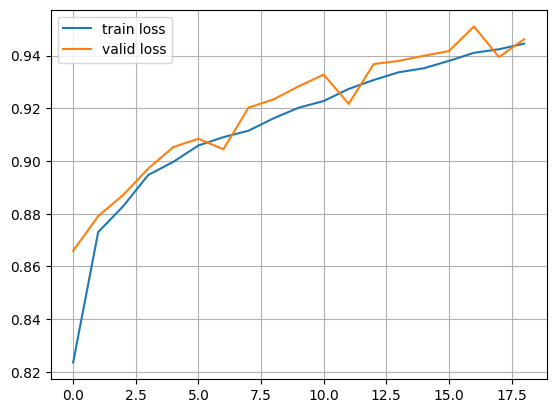

In [94]:
plt.plot(history.history["categorical_accuracy"], label="train loss")
plt.plot(history.history["val_categorical_accuracy"], label="valid loss")
plt.legend()
plt.grid()

In [95]:
test_out = model(x_test).numpy()

In [96]:
accuracy_test = np.mean(test_out.argmax(axis=1) == y_test)
print(f"Accuracy test data: {accuracy_test.round(5)}" )

Accuracy test data: 0.897


batch_size=**4** lr=**0.001**
n_epochs=**10**


Dense(1024, activation="relu", input_shape=(num_features,)),

        Dense(1024, activation="relu"),
        Dense(1024, activation="relu"),
        Dense(10, activation="softmax"),

Accuracy test data: 0.8703

batch_size=**256** lr=**0.001** n_epochs=**10**

        Dense(1024, activation="relu", input_shape=(num_features,)),
        Dense(1024, activation="relu"),
        Dense(1024, activation="relu"),
        Dense(10, activation="softmax"),


Accuracy test data: 0.8882

Epoch 10: val_loss improved from 0.20018 to 0.18764, saving model to best.hdf5
234/234 [==============================] - 2s 10ms/step - loss: 0.2111 - categorical_accuracy: 0.9191 - val_loss: 0.1876 - val_categorical_accuracy: 0.9276

        Dense(512, activation="relu", input_shape=(num_features,)),
        Dense(1024, activation="relu"),
        Dense(1024, activation="relu"),
        Dense(10, activation="softmax"),

batch_size=**256** lr=**0.001** n_epochs=**10**

Accuracy test data: **0.8887**

Epoch 15: val_loss improved from 0.16578 to 0.14717, saving model to best.hdf5
234/234 [==============================] - 3s 13ms/step - loss: 0.1662 - categorical_accuracy: 0.9361 - val_loss: 0.1472 - val_categorical_accuracy: 0.9440

        Dense(512, activation="relu", input_shape=(num_features,)),
        Dense(1024, activation="relu"),   
        Dense(1024, activation="relu"),
        Dense(10, activation="softmax"),


batch_size=**256** lr=**0.001** n_epochs=**15**

Accuracy test data: **0.8949**

Epoch 19: val_loss did not improve from 0.12611
234/234 [==============================] - 2s 8ms/step - loss: 0.1414 - categorical_accuracy: 0.9446 - val_loss: 0.1388 - val_categorical_accuracy: 0.9462

        Dense(1024, activation="relu", input_shape=(num_features,)),
        Dense(1024, activation="relu"),
        Dense(1024, activation="relu"),
        Dense(10, activation="softmax"),

batch_size=**256** lr=**0.001** n_epochs=**20**

Accuracy test data: **0.897**